### Problem Statement

A US bike-sharing provider BoomBikes has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to end.

__The company wants to know:__
    
-  Which variables are significant in predicting the demand for shared bikes.
-  How well those variables describe the bike demands.

__The process are:__

-  Data Understanding and exploration
-  Data Visualisation
-  Data Preparation
-  Model building 
-  Model evaluation

#### Step 1 : Data Understanding and Exploration

In [1]:
# Importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#for model building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

import datetime
import scipy
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
bike = pd.read_csv('day.csv',index_col='instant')

In [3]:
bike.head() # View data

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
print("No of Records: ",bike.shape[0])
print("No of Columns: ",bike.shape[1])

No of Records:  730
No of Columns:  15


In [5]:
bike.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

Data set has 730 observations and 15 variables which give us following information:

__Data Dictionary__

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


There is no missiong values in the data set. So no need of missing value imputation

In [7]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


__Note:__ The casual and registered user columns are not useful for prediticing rental bike user. so we can drop those cols

In [8]:
bike = bike.drop(columns=['casual', 'registered'])

#### 1.1 Date Time

Validation of Date, month and Year

In [9]:
bike['dteday'].apply(lambda x: int(x.split('-')[0])).describe() #checking invaild date

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: dteday, dtype: float64

In [10]:
bike['dteday'].apply(lambda x: int(x.split('-')[1])).describe() #checking invaild month

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: dteday, dtype: float64

In [11]:
bike['dteday'].apply(lambda x: int(x.split('-')[2])).describe() #checking invaild year

count     730.000000
mean     2018.500000
std         0.500343
min      2018.000000
25%      2018.000000
50%      2018.500000
75%      2019.000000
max      2019.000000
Name: dteday, dtype: float64

__Notes__

All the range of date, month & year are in the valid range, hence we can proceed ahead with this column without dropping / changing any records
On analysing date column we can see that all the attributes of date except for day are comfortably covered under month & year column.
So, we will extract only the date part from this column and use it.

In [12]:
bike['dteday'] = bike['dteday'].apply(lambda x: int(x.split('-')[0]))
bike = bike.rename(columns={"dteday": "date"}) # Extracting only date from full date

In [13]:
date_dist = round(bike.groupby(by='date').cnt.mean()/1000, 2)

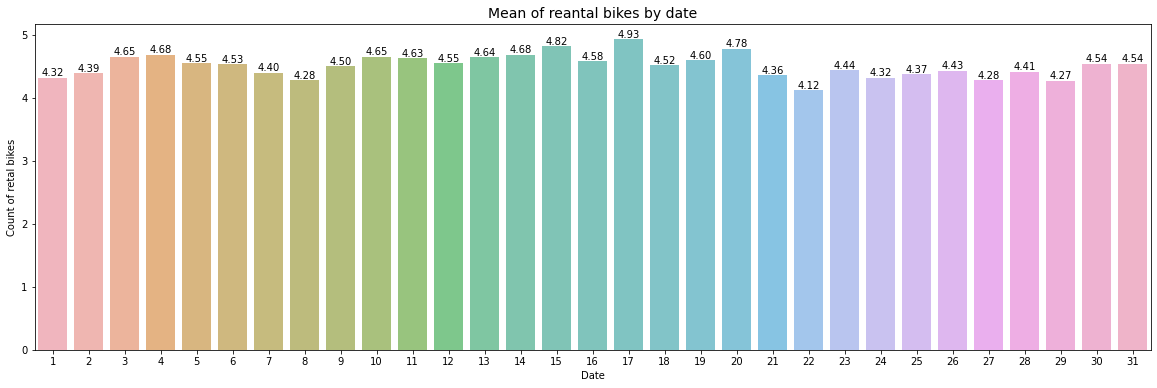

In [14]:
plt.figure(figsize=(20,6))
ax1=sns.barplot(x=date_dist.index,y=date_dist.values,alpha=0.7)
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
plt.title("Mean of reantal bikes by date", fontsize=14)

plt.xlabel("Date")
plt.xticks(rotation=0)
plt.ylabel('Count of retal bikes')
plt.show()

__Note__:
There is no significant impact of day of month on rental bikes

#### 1.2 Year

In [15]:
yr_mean=bike.groupby(by="yr").cnt.mean()
yr_mean

yr
0    3405.761644
1    5610.252055
Name: cnt, dtype: float64

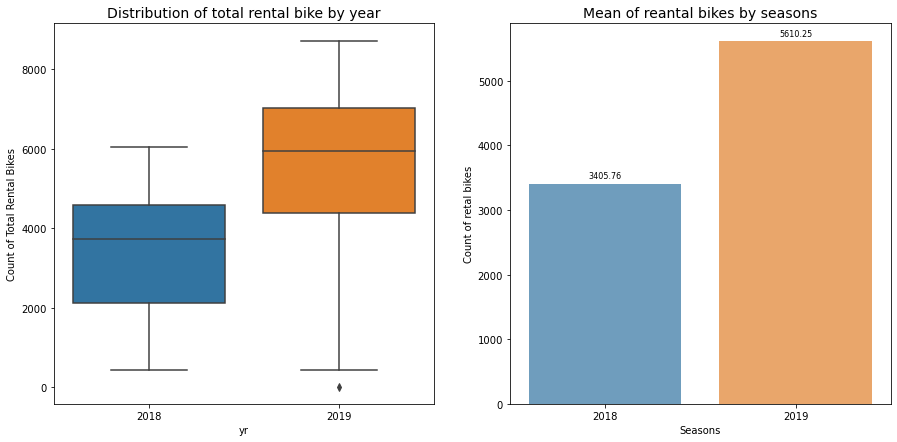

In [16]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
ax=sns.boxplot(x="yr",y = "cnt", data=bike)
plt.title("Distribution of total rental bike by year", fontsize=14)
plt.ylabel("Count of Total Rental Bikes")
ax.set_xticklabels(["2018","2019"])
plt.subplot(1, 2, 2)
ax1=sns.barplot(x=yr_mean.index,y=yr_mean.values,alpha=0.7)
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8,xytext=(0, 8),
                   textcoords='offset points')
ax1.set_xticklabels(["2018","2019"])
plt.title("Mean of reantal bikes by seasons", fontsize=14)

plt.xlabel("Seasons")
plt.xticks(rotation=0)
plt.ylabel('Count of retal bikes')
plt.show()

__Note__: Ride count has increased significantly in 2019 as compared to 2018. This can also be decisive factor for predicting target varibale

#### 1.3 Month

In [17]:
month_mean = bike.groupby(by='mnth').cnt.mean()

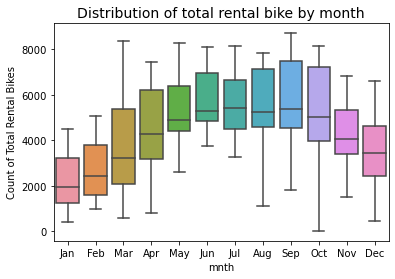

In [18]:
ax=sns.boxplot(x="mnth",y = "cnt", data=bike)
plt.title("Distribution of total rental bike by month", fontsize=14)
plt.ylabel("Count of Total Rental Bikes")
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.show()

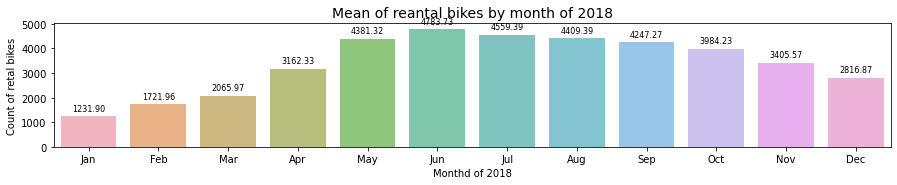

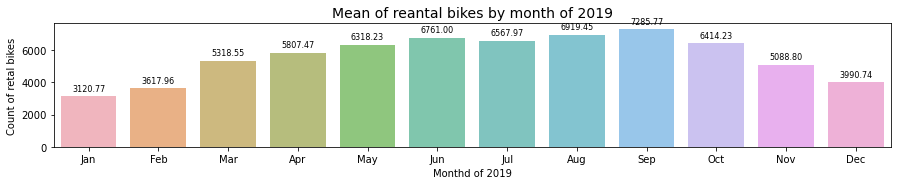

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(2, 1, 1)
ax1=sns.barplot(x=month_mean.index,y=bike[bike["yr"]==0].groupby(by='mnth').cnt.mean().values,alpha=0.7)
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8,xytext=(0, 8),
                   textcoords='offset points')
plt.title("Mean of reantal bikes by month of 2018", fontsize=14)
ax1.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.xlabel("Monthd of 2018")
plt.xticks(rotation=0)
plt.ylabel('Count of retal bikes')
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(2, 1, 2)
ax2=sns.barplot(x=month_mean.index,y=bike[bike["yr"]==1].groupby(by='mnth').cnt.mean().values,alpha=0.7)
for bar in ax2.patches:
    ax2.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8,xytext=(0, 8),
                   textcoords='offset points')
plt.title("Mean of reantal bikes by month of 2019", fontsize=14)
ax2.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.xlabel("Monthd of 2019")
plt.xticks(rotation=0)
plt.ylabel('Count of retal bikes')
plt.show()

__Note__: The bike rental has increased notably on the month of May to October on both years

#### 1.4 Holiday

In [20]:
holiday_mean = bike.groupby(by='holiday').cnt.mean()
holiday_mean

holiday
0    4530.90268
1    3735.00000
Name: cnt, dtype: float64

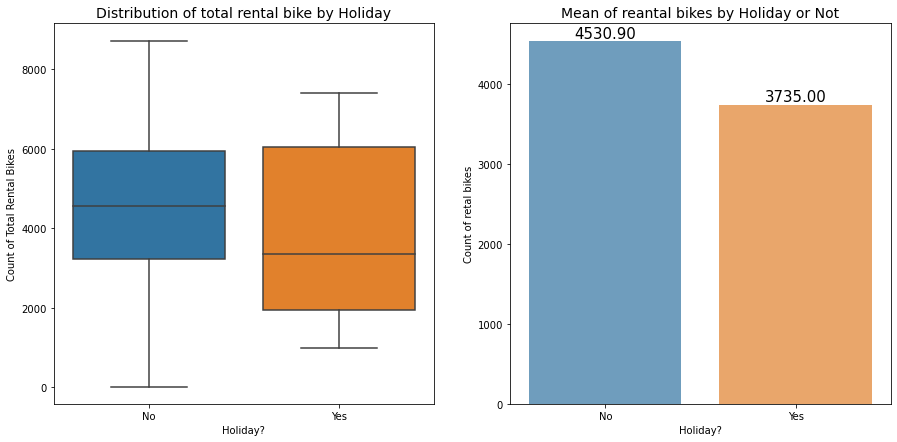

In [21]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
ax=sns.boxplot(x="holiday",y = "cnt", data=bike)
plt.title("Distribution of total rental bike by Holiday", fontsize=14)
plt.ylabel("Count of Total Rental Bikes")
plt.xlabel("Holiday?")
ax.set_xticklabels(["No","Yes"])
plt.subplot(1, 2, 2)
ax1=sns.barplot(x=holiday_mean.index,y=holiday_mean.values,alpha=0.7)
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Mean of reantal bikes by Holiday or Not", fontsize=14)
ax1.set_xticklabels(["No","Yes"])
plt.xlabel("Holiday?")
plt.xticks(rotation=0)
plt.ylabel('Count of retal bikes')
plt.show()

#### 1.5 Weekdays

In [22]:
weekday_mean = bike.groupby(by='weekday').cnt.mean()
weekday_mean

weekday
0    4665.721154
1    4259.819048
2    4274.495238
3    4444.961538
4    4691.567308
5    4597.423077
6    4626.692308
Name: cnt, dtype: float64

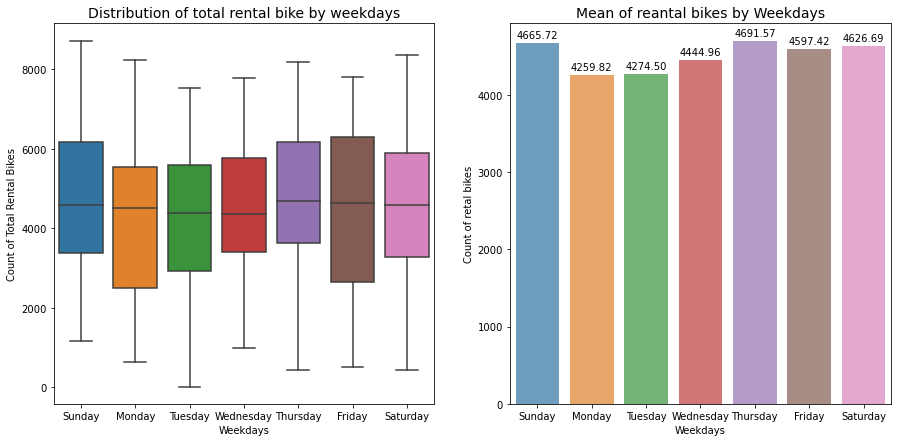

In [23]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
ax=sns.boxplot(x="weekday",y = "cnt", data=bike)
plt.title("Distribution of total rental bike by weekdays", fontsize=14)
plt.ylabel("Count of Total Rental Bikes")
plt.xlabel("Weekdays")
ax.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.subplot(1, 2, 2)
ax1=sns.barplot(x=weekday_mean.index,y=weekday_mean.values,alpha=0.7)
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Mean of reantal bikes by Weekdays", fontsize=14)
ax1.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xlabel("Weekdays")
plt.xticks(rotation=0)
plt.ylabel('Count of retal bikes')
plt.show()

__Note:__ we can see that, the each days of the week does not highly contribute the total rental bikes

#### 1.6 Working Day

In [24]:
workingday_mean = bike.groupby(by='workingday').cnt.mean()
workingday_mean

workingday
0    4587.862832
1    4472.198413
Name: cnt, dtype: float64

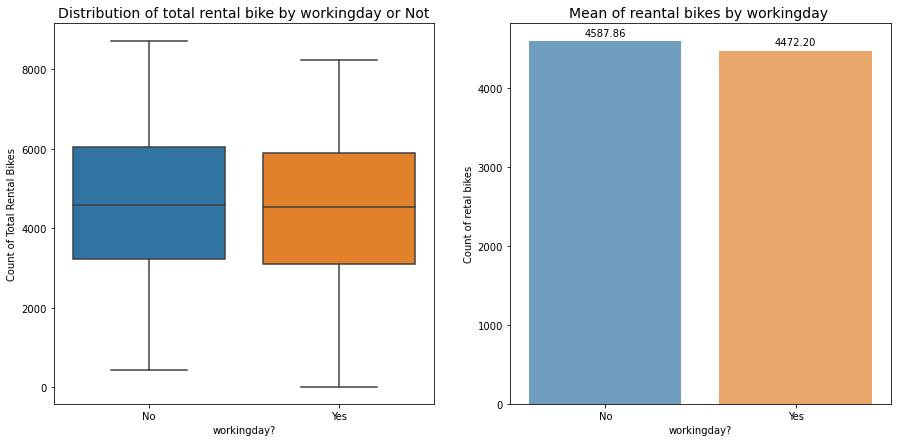

In [25]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
ax=sns.boxplot(x="workingday",y = "cnt", data=bike)
plt.title("Distribution of total rental bike by workingday or Not", fontsize=14)
plt.ylabel("Count of Total Rental Bikes")
plt.xlabel("workingday?")
ax.set_xticklabels(["No","Yes"])
plt.subplot(1, 2, 2)
ax1=sns.barplot(x=workingday_mean.index,y=workingday_mean.values,alpha=0.7)
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Mean of reantal bikes by workingday ", fontsize=14)
ax1.set_xticklabels(["No","Yes"])
plt.xlabel("workingday?")
plt.xticks(rotation=0)
plt.ylabel('Count of retal bikes')
plt.show()

#### 1.7 Seasons

In [26]:
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}) 
#mapping the seasons based on data dictionary

In [27]:
bike['season'].describe()

count      730
unique       4
top       fall
freq       188
Name: season, dtype: object

In [28]:
bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [29]:
bike.groupby(by='season').cnt.sum().sort_values()

season
spring     469514
winter     841613
summer     918589
fall      1061129
Name: cnt, dtype: int64

In [30]:
season_mean = bike.groupby(by='season').cnt.mean().sort_values()

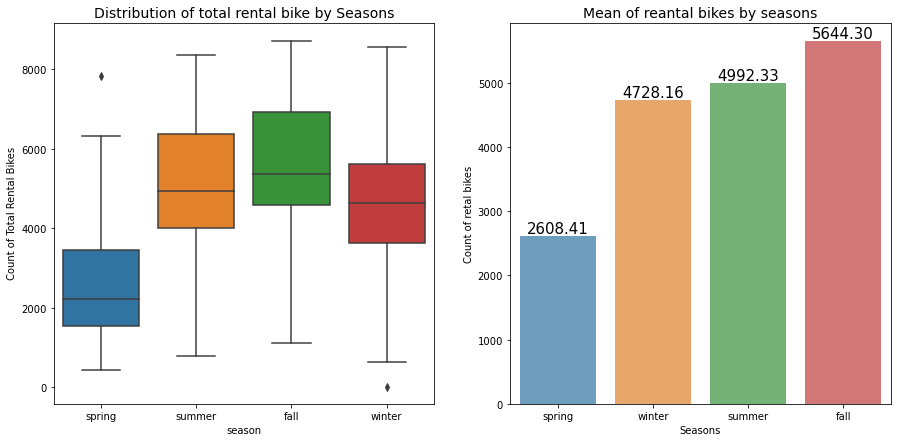

In [31]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
ax= sns.boxplot(x="season",y = "cnt", data=bike)
plt.title("Distribution of total rental bike by Seasons", fontsize=14)
plt.ylabel(" Count of Total Rental Bikes")

plt.subplot(1, 2, 2)
ax1=sns.barplot(x=season_mean.index,y=season_mean.values,alpha=0.7)
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Mean of reantal bikes by seasons", fontsize=14)

plt.xlabel("Seasons")
plt.xticks(rotation=0)
plt.ylabel('Count of retal bikes')
plt.show()

__Notes:__

The number of bike rentals in summer and fall is high but it’s the same in winter while in the spring mean number of bike rentals is the smallest.

It can be caused by the climate, if winter tends to be really mild and it’s spring that has the worst weather conditions that would explain the observed differences pretty good. We also cannot exclude the possibility that that there are other factors that make the result look like that. We will not dive deeper into it but from the perspective of the model that will later be built we can come to conclusion that realtionship between season and number of bike rentals is not linear.

Now we will take a look at the weather more directly.

#### 1.8 Weather Situation

In [32]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [33]:
bike['weathersit'] = bike.weathersit.map({1: 'Good', 2: 'Fair', 3: 'Bad', 4: 'VeryBad'})

In [34]:
weathersit_mean=bike.groupby(by='weathersit').cnt.mean().sort_values(ascending=False)

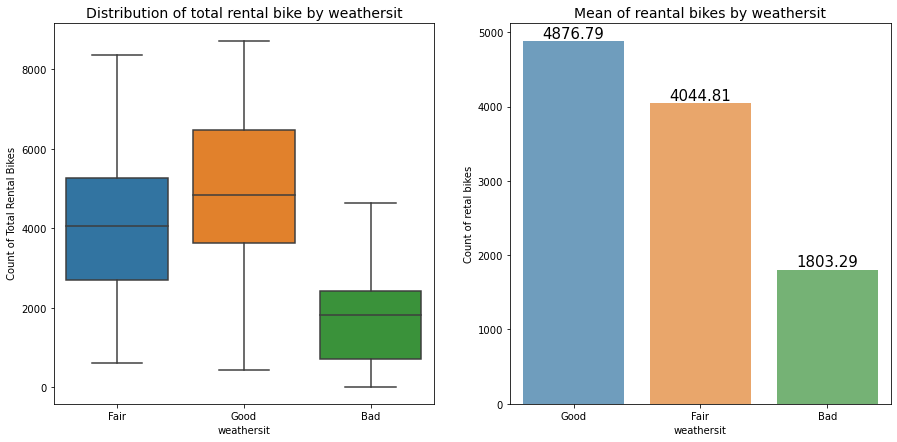

In [35]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
ax= sns.boxplot(x="weathersit",y = "cnt", data=bike)
plt.title("Distribution of total rental bike by weathersit", fontsize=14)
plt.ylabel(" Count of Total Rental Bikes")

plt.subplot(1, 2, 2)
ax1=sns.barplot(x=weathersit_mean.index,y=weathersit_mean.values,alpha=0.7)
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Mean of reantal bikes by weathersit", fontsize=14)
plt.xlabel("weathersit")
plt.xticks(rotation=0)
plt.ylabel('Count of retal bikes')
plt.show()

__Note:__

Weather is clearly impacting the numer of rentals. Mean is going down along with weather conditions getting worser. 

To gain more insight about the influence of the weather on number of bike rentals we might take a closer look at specified weather characteristics like temperature, windspeed or air humidity.

#### 1.9 Temperature

In [36]:
headers = ['Temperature', 'Adjusted Temperature']
pd.DataFrame(np.corrcoef(bike['temp'], bike["atemp"]), index=headers, columns=headers)

,Temperature,Adjusted Temperature
Temperature,1.000000,0.991696
Adjusted Temperature,0.991696,1.000000


__Note:__ there is high correlation that appears between Temperature & Adjusted Temperature by just visualising the columns. it produce multi colinearity so we can drop any one of attribute

In [37]:
bike = bike.drop(columns=['atemp'])

In [38]:
bike.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

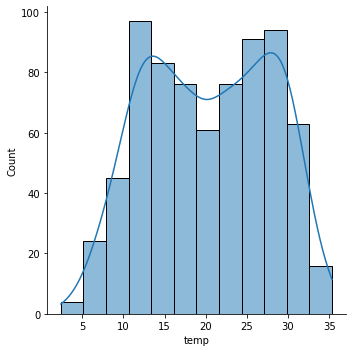

In [39]:
sns.displot(bike.temp,kde=True)

Text(0.5, 0, 'Temperature')

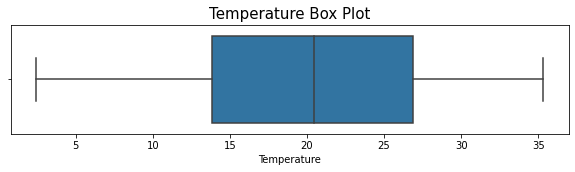

In [40]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=bike, x='temp')
plt.title('Temperature Box Plot', fontdict={'fontsize': 15})
plt.xlabel('Temperature', fontdict={'fontsize': 10})

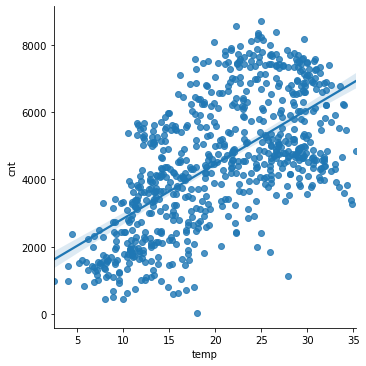

In [41]:
sns.lmplot(x ='temp', y ='cnt', data = bike)

In [42]:
np.corrcoef(bike['temp'], bike["cnt"])[0][1]

0.6270440344135153

#### Various methods of finding co-relation b/w varibales

In [43]:
print(scipy.stats.pearsonr(bike['temp'], bike["cnt"])[0])    # Pearson's r

print(scipy.stats.spearmanr(bike['temp'], bike["cnt"])[0])   # Spearman's rho

print(scipy.stats.kendalltau(bike['temp'], bike["cnt"])[0]) # Kendall's tau

0.6270440344135153
0.6212472561105677
0.4315329867565242


#### 1.10 Humidity

In [44]:
bike.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

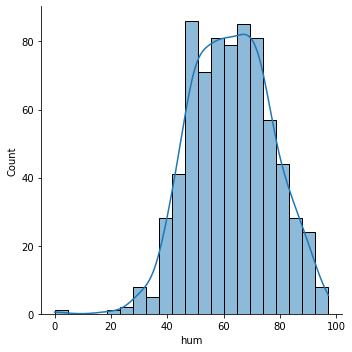

In [45]:
sns.displot(bike.hum,kde=True)

Text(0.5, 0, 'Humitity')

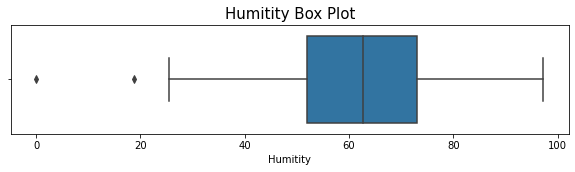

In [46]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=bike, x='hum')
plt.title('Humitity Box Plot', fontdict={'fontsize': 15})
plt.xlabel('Humitity', fontdict={'fontsize': 10})

In [47]:
bike[bike['hum'] == 0]

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,,
69,10,spring,0,3,0,6,0,Bad,15.952731,0.0,17.545759,623


__Note:__ The humitity cannot be Zero, it might be value error, March will be start of spring in USA

In [48]:
bike[(bike["yr"]==1) & (bike["mnth"]==3)].hum

instant
425    61.5417
426    65.7083
427    62.1250
428    40.3333
429    50.6250
430    45.6667
431    51.3333
432    56.7500
433    40.7083
434    35.0417
435    47.6957
436    48.9167
437    61.7500
438    50.7083
439    57.9583
440    84.2083
441    75.5833
442    81.0000
443    72.8750
444    80.7917
445    82.1250
446    83.1250
447    69.4167
448    88.5417
449    88.0833
450    47.7917
451    29.0000
452    48.1250
453    43.9167
454    58.0833
455    73.8333
Name: hum, dtype: float64

In [49]:
mean_hum = bike[(bike["yr"]==0) & (bike["mnth"]==3) & (bike["hum"]>0)].hum.mean()
mean_hum

58.83943

__Note:__ The month of March mean of humidity is 58.83943. We can impute this value to the 0 hum record

In [50]:
bike.at[int(bike[bike['hum'] == 0.0].hum.index.values), "hum"] = mean_hum

In [51]:
bike[(bike["yr"]==0) & (bike["mnth"]==3) & (bike["hum"]==0)].hum # sucessfully imputed

Series([], Name: hum, dtype: float64)

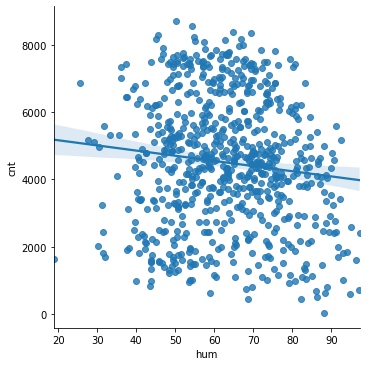

In [52]:
sns.lmplot(x ='hum', y ='cnt', data = bike)

In [53]:
np.corrcoef(bike['hum'], bike["cnt"])[0][1]

-0.1114098142194343

__Note:__ there is no strong relationship between humitity and total bike rental

#### 1.11 Wind Speed

In [54]:
bike.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

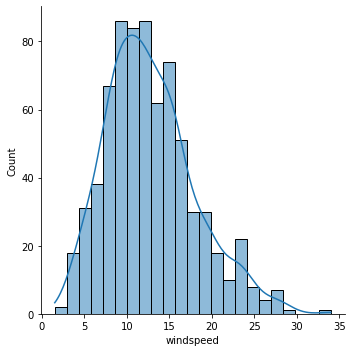

In [55]:
sns.displot(bike.windspeed,kde=True)

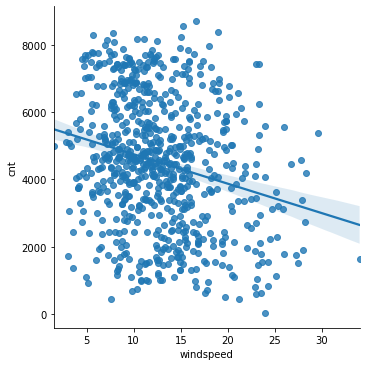

In [56]:
sns.lmplot(x ='windspeed', y ='cnt', data = bike)

In [57]:
np.corrcoef(bike['hum'], bike["cnt"])[0][1]

-0.1114098142194343

####  2.1 Plotting all variable against each other

In [58]:
df = pd.read_csv('day.csv')

In [59]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [60]:
df['dteday'] = df['dteday'].apply(lambda x: int(x.split('-')[0]))
df = df.rename(columns={"dteday": "date"})
df['yr'] = df['yr'].map({0: 2018, 1:2019})
df = df.drop(columns=['atemp', 'casual', 'registered',"instant"])
df.at[int(df[df['hum'] == 0.0].hum.index.values), "hum"] = mean_hum

In [61]:
df.head(5)

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,2018,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,2,1,2018,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,3,1,2018,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,4,1,2018,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,5,1,2018,1,0,5,1,1,9.305237,43.6957,12.522300,1600


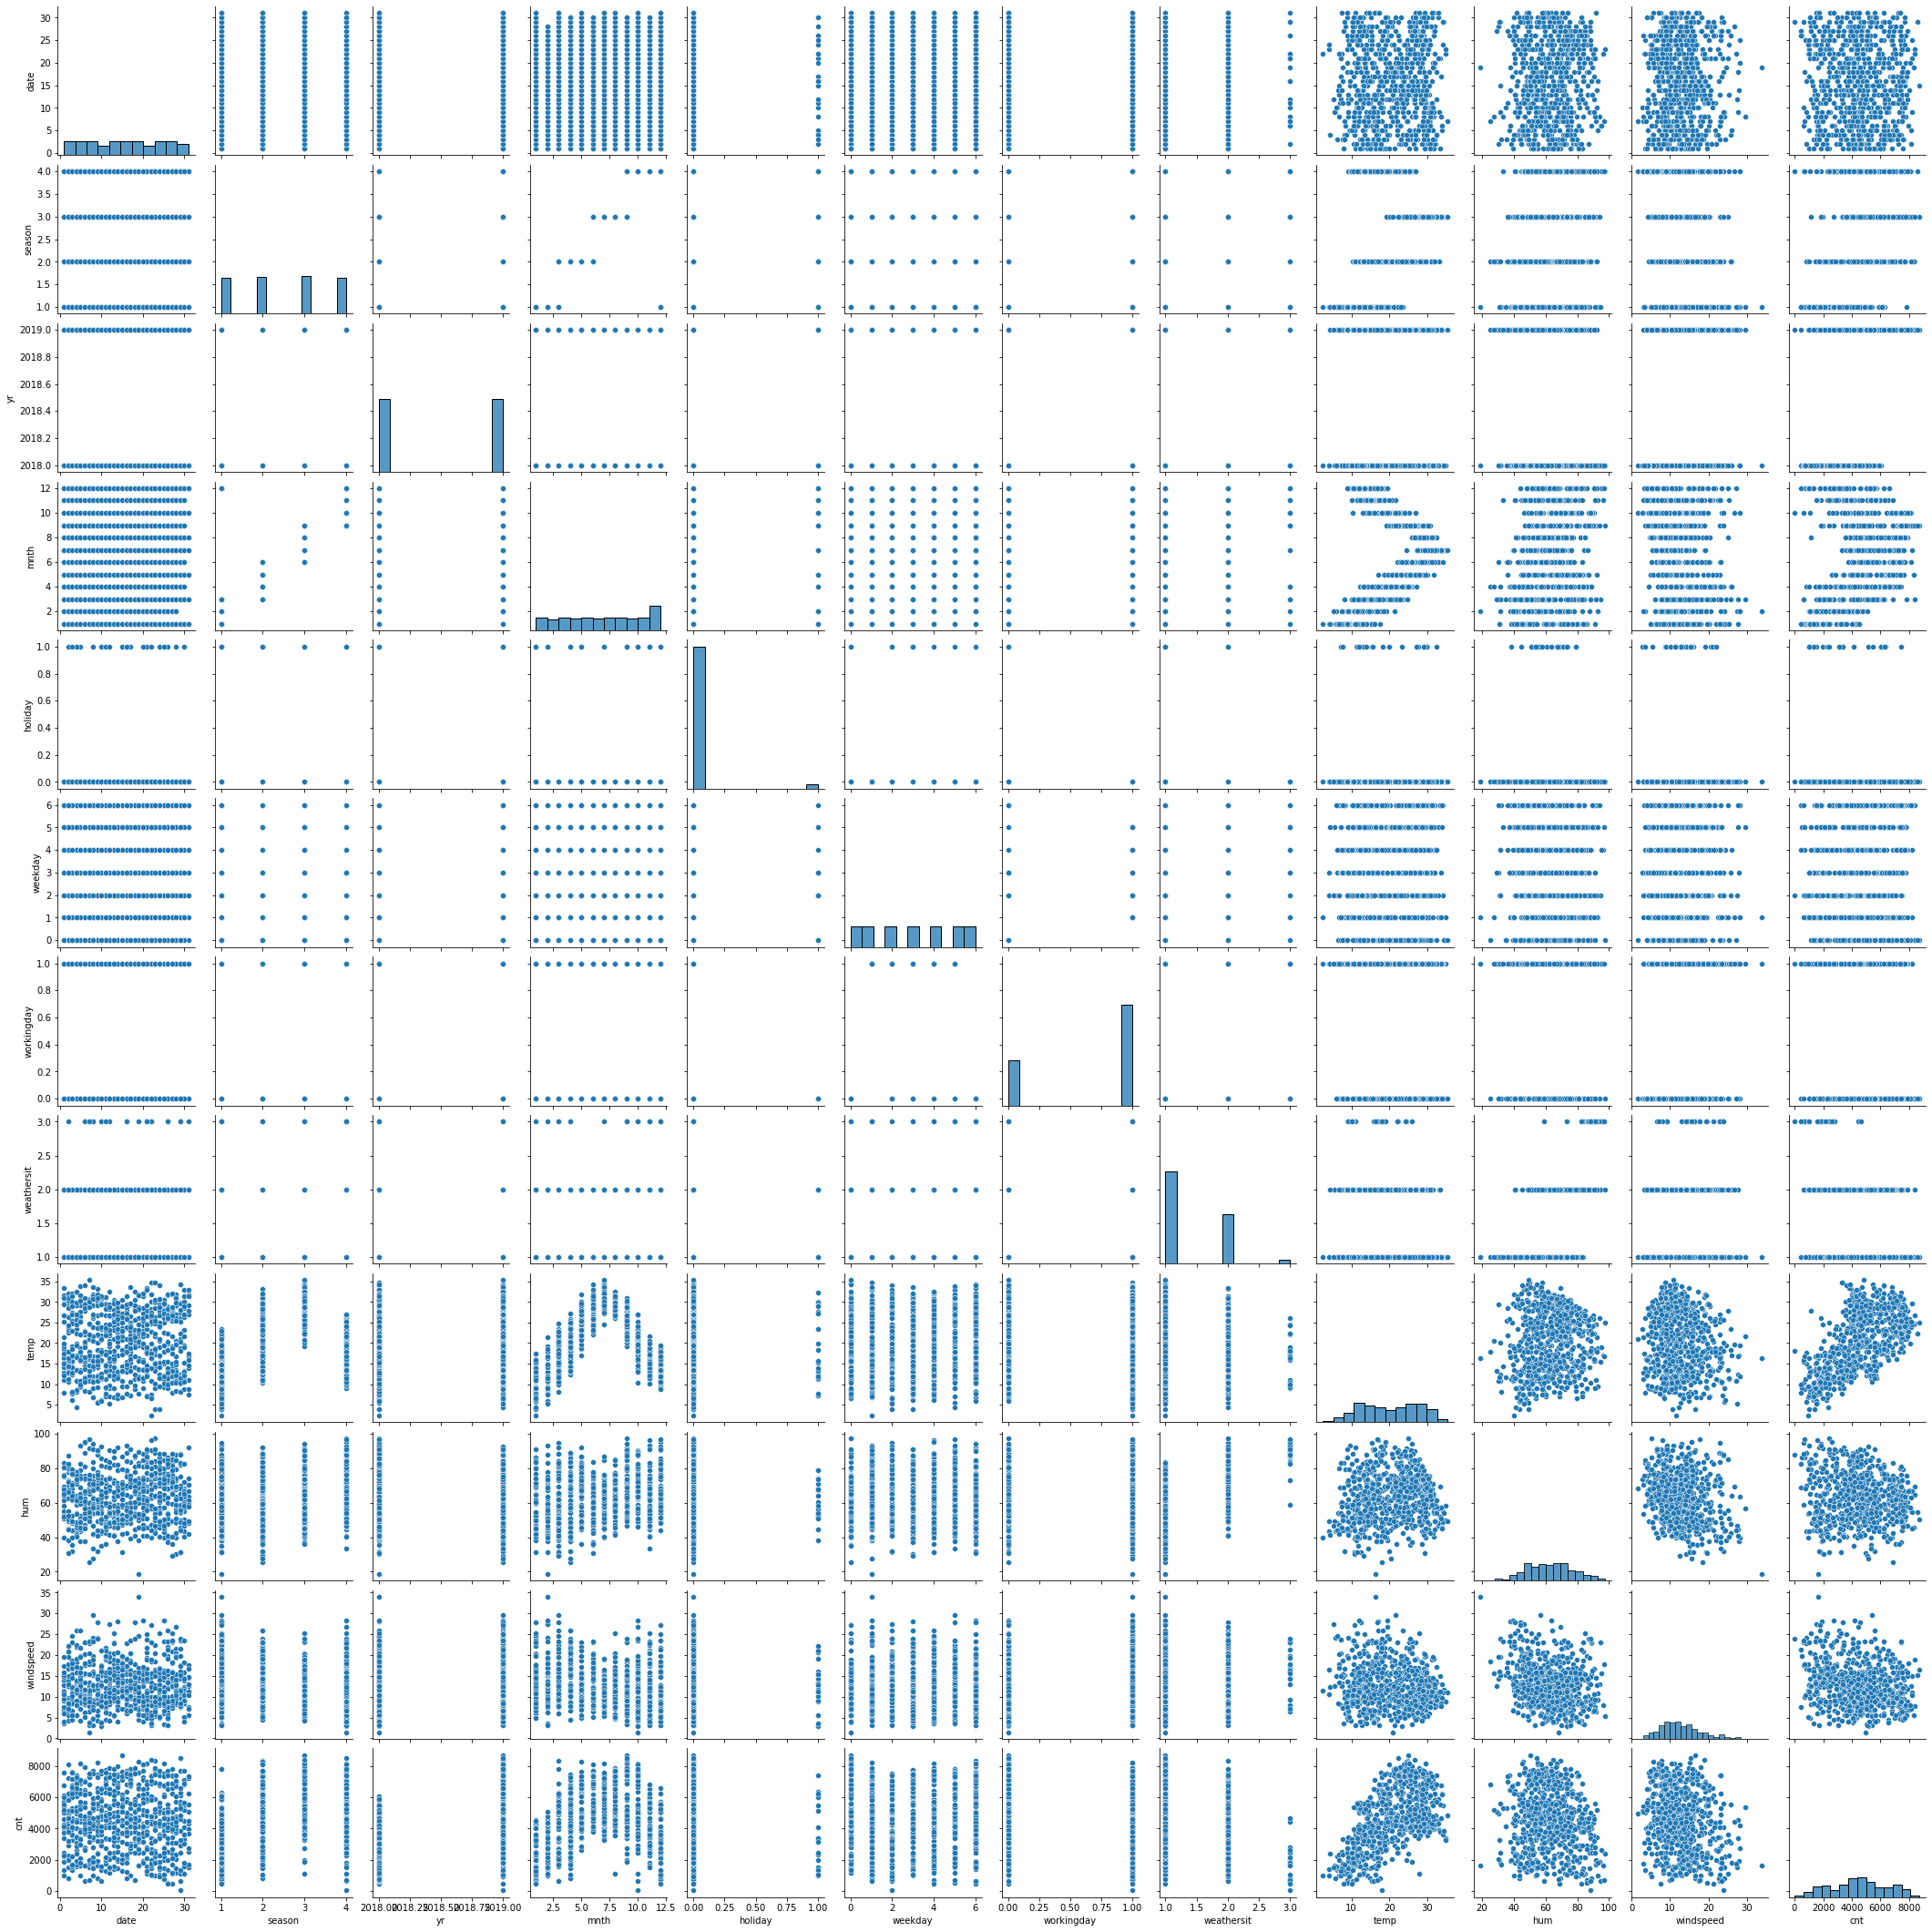

In [62]:
sns.pairplot(df)

__Notes:__

1) The Date attribute scattered all over the place, it doesn't give any pattern

2) Total ride seems to be in maximum in Fall (Autumn) followed by Summer, Spring & Winter respectively.

3) Total ride has increased drastically in 2019 as compared to 2018.

4) The Total ride seems to increase between May to October which are comparatively Fall(Autumn) & Summer season in USA

5) The Total ride Count seems to be very much lienarly dependent on Temperature

6) Humidity & windspeed does not indicate any specific behaviour on just visualising the data

#### 3 Data Preparation

#### 3.1 One-Hot Encoding 
Month, Season, Weekday, Weather columns has categorical varibale. So create dummy varible which has binary values

In [63]:
bike["mnth"]=bike.mnth.astype("str")
bike["weekday"]=bike.weekday.astype("str")

In [64]:
dummy_variables_columns = ['mnth', 'season', 'weekday', 'weathersit']

In [65]:
dummy = pd.get_dummies(bike[dummy_variables_columns], drop_first=True)
dummy.head(10)

,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,...,season_summer,season_winter,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Fair,weathersit_Good
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [66]:
bike = pd.concat([bike, dummy], axis=1)

In [67]:
bike = bike.drop(columns=dummy_variables_columns)

#### 3.2 Train and Test data spillting

In [68]:
df_train, df_test = train_test_split(bike, train_size=0.7, random_state=108)

In [69]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


#### 3.3 Scaling the Data

In [70]:
num_var = ['date', 'temp', 'hum', 'windspeed', 'cnt']

In [71]:
scaler = MinMaxScaler()

In [72]:
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head(5)

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_10,mnth_11,...,season_summer,season_winter,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Fair,weathersit_Good
instant,,,,,,,,,,,,,,,,,,,,,
11,0.333333,0,0,1,0.094844,0.589279,0.199940,0.103344,0,0,...,0,0,0,0,0,1,0,0,1,0
651,0.400000,1,0,0,0.387915,0.313995,0.260076,0.838320,1,0,...,0,1,0,0,0,0,0,0,0,1
526,0.300000,1,0,1,0.823563,0.376794,0.228966,0.774076,0,0,...,1,0,1,0,0,0,0,0,0,1
656,0.566667,1,0,1,0.556729,0.649521,0.487485,0.888610,1,0,...,0,1,0,0,0,0,1,0,1,0
85,0.833333,0,0,1,0.221280,0.169857,0.418943,0.258361,0,0,...,1,0,1,0,0,0,0,0,0,1


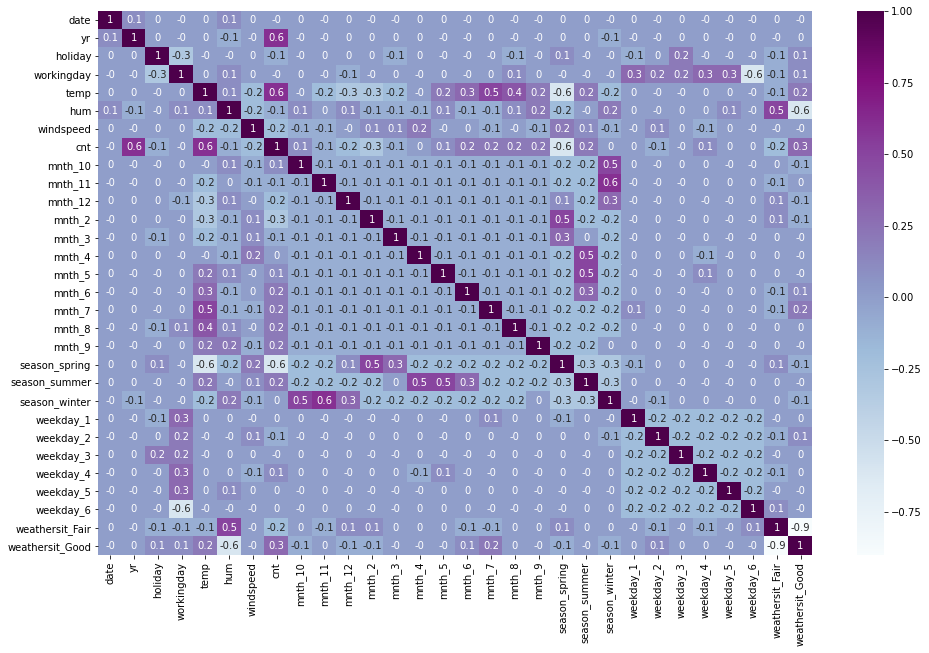

In [73]:
df_train.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(round(df_train.corr(), 1), annot=True, cmap='BuPu')
plt.show()

In [74]:
y_train = df_train.pop('cnt')

In [75]:
X_train = df_train

#### 4 Model Building

#### 4.1 Model 1

In [76]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     90.16
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.19e-174
Time:                        07:35:25   Log-Likelihood:                 477.50
No. Observations:                 510   AIC:                            -895.0
Df Residuals:                     480   BIC:                            -768.0
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0692      0.056      1.241      0.215      -0.040       0.179
date               -0.0206      0.015     -1.394      0.164      -0.050       0.008
yr                  0.2527      0.009     28.116      0.000       0.235       0.270
holiday            -0.1812      0.071     -2.565      0.011      -0.320      -0.042
workingday         -0.0704      0.077     -0.916      0.360      -0.221       0.081
temp                0.4498      0.049      9.101      0.000       0.353       0.547
hum                -0.1176      0.033     -3.603      0.000      -0.182      -0.053
windspeed          -0.1354      0.025     -5.380      0.000      -0.185      -0.086
mnth_10             0.0520      0.037      1.418      0.157      -0.020       0.124
mnth_11            -0.0265      0.035     -0.763      0.446      -0.095       0.042
mnth_12            -0.0228      0.027     -0.855      0.393      -0.075       0.030
mnth_2              0.0122      0.022      0.546      0.585      -0.032       0.056
mnth_3              0.0594      0.025      2.361      0.019       0.010       0.109
mnth_4              0.0846      0.039      2.184      0.029       0.009       0.161
mnth_5              0.0912      0.042      2.188      0.029       0.009       0.173
mnth_6              0.0616      0.045      1.381      0.168      -0.026       0.149
mnth_7             -0.0378      0.050     -0.763      0.446      -0.135       0.060
mnth_8              0.0213      0.048      0.448      0.654      -0.072       0.115
mnth_9              0.0966      0.042      2.300      0.022       0.014       0.179
season_spring      -0.1087      0.033     -3.249      0.001      -0.175      -0.043
season_summer      -0.0153      0.029     -0.526      0.599      -0.073       0.042
season_winter       0.0794      0.031      2.546      0.011       0.018       0.141
weekday_1           0.0482      0.078      0.622      0.534      -0.104       0.201
weekday_2           0.0406      0.077      0.526      0.599      -0.111       0.192
weekday_3           0.0535      0.077      0.699      0.485      -0.097       0.204
weekday_4           0.0818      0.077      1.055      0.292      -0.070       0.234
weekday_5           0.0728      0.078      0.939      0.348      -0.080       0.225
weekday_6           0.0122      0.016      0.739      0.460      -0.020       0.044
weathersit_Fair     0.1540      0.030      5.113      0.000       0.095       0.213
weathersit_Good     0.2171      0.032      6.724      0.000       0.154       0.281
==============================================================================
Omnibus:                       67.157   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.407
Skew:                          -0.723   Prob(JB):                     2.66

In [77]:
def vif_cal(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [78]:
vif_cal(X_train_sm)

,Features,VIF
0,const,165.71
1,workingday,66.61
2,weekday_4,43.20
3,weekday_1,41.11
4,weekday_5,39.73
5,weekday_3,36.57
6,weekday_2,35.27
7,weathersit_Good,12.63
8,season_spring,11.23
9,mnth_7,10.96


__Note:__ "Workingday" column has VIF of 66 and P-value is higher than critcal value. So removing the Working Day col

In [79]:
X_train = X_train.drop("workingday",axis=1)

In [80]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     93.38
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.05e-175
Time:                        07:35:25   Log-Likelihood:                 477.05
No. Observations:                 510   AIC:                            -896.1
Df Residuals:                     481   BIC:                            -773.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0684      0.056      1.228      0.220      -0.041       0.178
date               -0.0210      0.015     -1.425      0.155      -0.050       0.008
yr                  0.2534      0.009     28.283      0.000       0.236       0.271
holiday            -0.1216      0.028     -4.417      0.000      -0.176      -0.067
temp                0.4523      0.049      9.168      0.000       0.355       0.549
hum                -0.1187      0.033     -3.641      0.000      -0.183      -0.055
windspeed          -0.1354      0.025     -5.380      0.000      -0.185      -0.086
mnth_10             0.0523      0.037      1.428      0.154      -0.020       0.124
mnth_11            -0.0271      0.035     -0.781      0.435      -0.095       0.041
mnth_12            -0.0222      0.027     -0.833      0.405      -0.075       0.030
mnth_2              0.0122      0.022      0.544      0.587      -0.032       0.056
mnth_3              0.0585      0.025      2.328      0.020       0.009       0.108
mnth_4              0.0825      0.039      2.133      0.033       0.007       0.158
mnth_5              0.0902      0.042      2.165      0.031       0.008       0.172
mnth_6              0.0601      0.045      1.349      0.178      -0.027       0.148
mnth_7             -0.0390      0.050     -0.788      0.431      -0.136       0.058
mnth_8              0.0199      0.048      0.420      0.675      -0.073       0.113
mnth_9              0.0961      0.042      2.288      0.023       0.014       0.179
season_spring      -0.1082      0.033     -3.234      0.001      -0.174      -0.042
season_summer      -0.0150      0.029     -0.513      0.608      -0.072       0.042
season_winter       0.0788      0.031      2.528      0.012       0.018       0.140
weekday_1          -0.0212      0.016     -1.302      0.193      -0.053       0.011
weekday_2          -0.0283      0.017     -1.664      0.097      -0.062       0.005
weekday_3          -0.0149      0.017     -0.883      0.378      -0.048       0.018
weekday_4           0.0124      0.016      0.766      0.444      -0.019       0.044
weekday_5           0.0034      0.016      0.206      0.837      -0.029       0.036
weekday_6           0.0122      0.016      0.740      0.460      -0.020       0.044
weathersit_Fair     0.1540      0.030      5.113      0.000       0.095       0.213
weathersit_Good     0.2165      0.032      6.709      0.000       0.153       0.280
==============================================================================
Omnibus:                       66.174   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.698
Skew:                          -0.717   Prob(JB):                     1.70e-31
Kurtosis:                       5.147   Cond. No.                         46.5


In [81]:
vif_cal(X_train_sm)

,Features,VIF
0,const,165.68
1,weathersit_Good,12.63
2,season_spring,11.23
3,mnth_7,10.95
4,weathersit_Fair,10.59
5,mnth_8,9.49
6,season_winter,9.33
7,season_summer,8.60
8,temp,7.69
9,mnth_6,7.48


__Note:__ Checking Each varible with lot combination will be tedious process. So we going for Recurssive Feature Elimation method

In [82]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [83]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
27,weathersit_Good,True,1
14,mnth_7,True,1
26,weathersit_Fair,True,1
12,mnth_5,True,1
11,mnth_4,True,1
19,season_winter,True,1
17,season_spring,True,1
8,mnth_12,True,1
5,windspeed,True,1
4,hum,True,1


In [84]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     169.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.80e-184
Time:                        07:35:26   Log-Likelihood:                 465.54
No. Observations:                 510   AIC:                            -899.1
Df Residuals:                     494   BIC:                            -831.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0739      0.047      1.566      0.118      -0.019       0.167
yr                  0.2534      0.009     28.288      0.000       0.236       0.271
holiday            -0.1323      0.027     -4.885      0.000      -0.185      -0.079
temp                0.4917      0.037     13.417      0.000       0.420       0.564
hum                -0.1326      0.032     -4.150      0.000      -0.195      -0.070
windspeed          -0.1381      0.025     -5.469      0.000      -0.188      -0.088
mnth_11            -0.0661      0.021     -3.220      0.001      -0.106      -0.026
mnth_12            -0.0538      0.018     -3.000      0.003      -0.089      -0.019
mnth_4              0.0372      0.019      1.920      0.055      -0.001       0.075
mnth_5              0.0456      0.018      2.520      0.012       0.010       0.081
mnth_7             -0.0822      0.018     -4.468      0.000      -0.118      -0.046
mnth_9              0.0565      0.019      3.052      0.002       0.020       0.093
season_spring      -0.1048      0.021     -5.079      0.000      -0.145      -0.064
season_winter       0.0990      0.018      5.555      0.000       0.064       0.134
weathersit_Fair     0.1510      0.030      5.035      0.000       0.092       0.210
weathersit_Good     0.2103      0.032      6.526      0.000       0.147       0.274
==============================================================================
Omnibus:                       62.862   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.270
Skew:                          -0.676   Prob(JB):                     9.44e-31
Kurtosis:                       5.163   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
vif_cal(X_train_rfe)

,Features,VIF
0,temp,20.04
1,weathersit_Good,14.48
2,hum,11.45
3,weathersit_Fair,7.45
4,windspeed,5.04
5,season_spring,4.58
6,season_winter,3.56
7,yr,2.06
8,mnth_11,1.87
9,mnth_4,1.63


In [86]:
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.96e-181
Time:                        07:35:26   Log-Likelihood:                 456.80
No. Observations:                 510   AIC:                            -883.6
Df Residuals:                     495   BIC:                            -820.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0250      0.041     -0.603      0.547      -0.106       0.056
yr                  0.2597      0.009     28.947      0.000       0.242       0.277
holiday            -0.1360      0.028     -4.944      0.000      -0.190      -0.082
temp                0.4485      0.036     12.560      0.000       0.378       0.519
windspeed          -0.1116      0.025     -4.495      0.000      -0.160      -0.063
mnth_11            -0.0680      0.021     -3.261      0.001      -0.109      -0.027
mnth_12            -0.0595      0.018     -3.272      0.001      -0.095      -0.024
mnth_4              0.0311      0.020      1.583      0.114      -0.007       0.070
mnth_5              0.0323      0.018      1.787      0.075      -0.003       0.068
mnth_7             -0.0745      0.019     -4.002      0.000      -0.111      -0.038
mnth_9              0.0446      0.019      2.398      0.017       0.008       0.081
season_spring      -0.1165      0.021     -5.608      0.000      -0.157      -0.076
season_winter       0.0850      0.018      4.782      0.000       0.050       0.120
weathersit_Fair     0.1836      0.029      6.242      0.000       0.126       0.241
weathersit_Good     0.2727      0.029      9.411      0.000       0.216       0.330
==============================================================================
Omnibus:                       65.862   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.137
Skew:                          -0.705   Prob(JB):                     3.05e-32
Kurtosis:                       5.201   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
vif_cal(X_train_rfe)

,Features,VIF
0,weathersit_Good,14.19
1,temp,13.04
2,weathersit_Fair,7.25
3,windspeed,5.01
4,season_spring,3.66
5,season_winter,2.96
6,yr,2.02
7,mnth_11,1.85
8,mnth_7,1.62
9,mnth_4,1.54


In [88]:
col = col.drop(['weathersit_Good'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     154.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          9.26e-165
Time:                        07:35:26   Log-Likelihood:                 414.83
No. Observations:                 510   AIC:                            -801.7
Df Residuals:                     496   BIC:                            -742.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2471      0.032      7.692      0.000       0.184       0.310
yr                  0.2664      0.010     27.460      0.000       0.247       0.285
holiday            -0.1262      0.030     -4.233      0.000      -0.185      -0.068
temp                0.4469      0.039     11.540      0.000       0.371       0.523
windspeed          -0.1296      0.027     -4.826      0.000      -0.182      -0.077
mnth_11            -0.0695      0.023     -3.073      0.002      -0.114      -0.025
mnth_12            -0.0679      0.020     -3.447      0.001      -0.107      -0.029
mnth_4              0.0274      0.021      1.284      0.200      -0.015       0.069
mnth_5              0.0328      0.020      1.674      0.095      -0.006       0.071
mnth_7             -0.0720      0.020     -3.568      0.000      -0.112      -0.032
mnth_9              0.0409      0.020      2.027      0.043       0.001       0.080
season_spring      -0.1213      0.023     -5.387      0.000      -0.166      -0.077
season_winter       0.0697      0.019      3.627      0.000       0.032       0.107
weathersit_Fair    -0.0776      0.011     -7.361      0.000      -0.098      -0.057
==============================================================================
Omnibus:                       76.507   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.758
Skew:                          -0.886   Prob(JB):                     1.22e-30
Kurtosis:                       4.828   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
vif_cal(X_train_rfe)

,Features,VIF
0,temp,5.23
1,windspeed,4.81
2,season_winter,2.56
3,season_spring,2.12
4,yr,1.99
5,mnth_11,1.80
6,mnth_7,1.62
7,weathersit_Fair,1.51
8,mnth_12,1.38
9,mnth_4,1.38


In [90]:
col = col.drop(['yr'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     41.44
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           3.85e-67
Time:                        07:35:26   Log-Likelihood:                 179.12
No. Observations:                 510   AIC:                            -332.2
Df Residuals:                     497   BIC:                            -277.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3379      0.051      6.667      0.000       0.238       0.437
holiday            -0.0921      0.047     -1.949      0.052      -0.185       0.001
temp                0.5196      0.061      8.480      0.000       0.399       0.640
windspeed          -0.1636      0.043     -3.848      0.000      -0.247      -0.080
mnth_11            -0.0638      0.036     -1.779      0.076      -0.134       0.007
mnth_12            -0.0470      0.031     -1.506      0.133      -0.108       0.014
mnth_4              0.0579      0.034      1.716      0.087      -0.008       0.124
mnth_5              0.0381      0.031      1.224      0.221      -0.023       0.099
mnth_7             -0.0743      0.032     -2.320      0.021      -0.137      -0.011
mnth_9              0.0394      0.032      1.231      0.219      -0.023       0.102
season_spring      -0.0801      0.036     -2.247      0.025      -0.150      -0.010
season_winter       0.0730      0.030      2.397      0.017       0.013       0.133
weathersit_Fair    -0.0805      0.017     -4.813      0.000      -0.113      -0.048
==============================================================================
Omnibus:                       10.526   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                5.988
Skew:                           0.005   Prob(JB):                       0.0501
Kurtosis:                       2.469   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Final Model

In [91]:
col = X_train.columns[rfe.support_]
col = col.drop(['hum'])
col = col.drop(['weathersit_Good'])

X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_sm)
lr_model = lr1.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     154.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          9.26e-165
Time:                        07:35:26   Log-Likelihood:                 414.83
No. Observations:                 510   AIC:                            -801.7
Df Residuals:                     496   BIC:                            -742.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2471      0.032      7.692      0.000       0.184       0.310
yr                  0.2664      0.010     27.460      0.000       0.247       0.285
holiday            -0.1262      0.030     -4.233      0.000      -0.185      -0.068
temp                0.4469      0.039     11.540      0.000       0.371       0.523
windspeed          -0.1296      0.027     -4.826      0.000      -0.182      -0.077
mnth_11            -0.0695      0.023     -3.073      0.002      -0.114      -0.025
mnth_12            -0.0679      0.020     -3.447      0.001      -0.107      -0.029
mnth_4              0.0274      0.021      1.284      0.200      -0.015       0.069
mnth_5              0.0328      0.020      1.674      0.095      -0.006       0.071
mnth_7             -0.0720      0.020     -3.568      0.000      -0.112      -0.032
mnth_9              0.0409      0.020      2.027      0.043       0.001       0.080
season_spring      -0.1213      0.023     -5.387      0.000      -0.166      -0.077
season_winter       0.0697      0.019      3.627      0.000       0.032       0.107
weathersit_Fair    -0.0776      0.011     -7.361      0.000      -0.098      -0.057
==============================================================================
Omnibus:                       76.507   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.758
Skew:                          -0.886   Prob(JB):                     1.22e-30
Kurtosis:                       4.828   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:

col = col.drop(['mnth_4'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_sm)
lr_model = lr1.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     166.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.59e-165
Time:                        07:35:26   Log-Likelihood:                 413.98
No. Observations:                 510   AIC:                            -802.0
Df Residuals:                     497   BIC:                            -746.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2655      0.029      9.225      0.000       0.209       0.322
yr                  0.2671      0.010     27.546      0.000       0.248       0.286
holiday            -0.1233      0.030     -4.144      0.000      -0.182      -0.065
temp                0.4281      0.036     11.935      0.000       0.358       0.499
windspeed          -0.1251      0.027     -4.696      0.000      -0.177      -0.073
mnth_11            -0.0731      0.022     -3.254      0.001      -0.117      -0.029
mnth_12            -0.0707      0.020     -3.608      0.000      -0.109      -0.032
mnth_5              0.0246      0.019      1.327      0.185      -0.012       0.061
mnth_7             -0.0758      0.020     -3.796      0.000      -0.115      -0.037
mnth_9              0.0361      0.020      1.820      0.069      -0.003       0.075
season_spring      -0.1369      0.019     -7.205      0.000      -0.174      -0.100
season_winter       0.0597      0.018      3.397      0.001       0.025       0.094
weathersit_Fair    -0.0777      0.011     -7.359      0.000      -0.098      -0.057
==============================================================================
Omnibus:                       77.263   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.623
Skew:                          -0.889   Prob(JB):                     2.91e-31
Kurtosis:                       4.859   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
vif_cal(X_train_rfe)

,Features,VIF
0,temp,5.23
1,windspeed,4.24
2,season_winter,2.45
3,yr,1.97
4,season_spring,1.87
5,mnth_11,1.80
6,mnth_7,1.56
7,weathersit_Fair,1.50
8,mnth_12,1.38
9,mnth_5,1.27


In [94]:
col = col.drop(['mnth_5'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_sm)
lr_model = lr1.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     181.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.76e-166
Time:                        07:35:27   Log-Likelihood:                 413.08
No. Observations:                 510   AIC:                            -802.2
Df Residuals:                     498   BIC:                            -751.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2719      0.028      9.578      0.000       0.216       0.328
yr                  0.2670      0.010     27.516      0.000       0.248       0.286
holiday            -0.1227      0.030     -4.123      0.000      -0.181      -0.064
temp                0.4279      0.036     11.919      0.000       0.357       0.498
windspeed          -0.1267      0.027     -4.759      0.000      -0.179      -0.074
mnth_11            -0.0737      0.022     -3.280      0.001      -0.118      -0.030
mnth_12            -0.0712      0.020     -3.630      0.000      -0.110      -0.033
mnth_7             -0.0815      0.020     -4.179      0.000      -0.120      -0.043
mnth_9              0.0315      0.020      1.610      0.108      -0.007       0.070
season_spring      -0.1427      0.019     -7.706      0.000      -0.179      -0.106
season_winter       0.0544      0.017      3.177      0.002       0.021       0.088
weathersit_Fair    -0.0772      0.011     -7.311      0.000      -0.098      -0.056
==============================================================================
Omnibus:                       77.470   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.326
Skew:                          -0.893   Prob(JB):                     3.38e-31
Kurtosis:                       4.847   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
vif_cal(X_train_rfe)

,Features,VIF
0,temp,4.87
1,windspeed,4.24
2,season_winter,2.38
3,yr,1.97
4,season_spring,1.83
5,mnth_11,1.80
6,weathersit_Fair,1.49
7,mnth_7,1.47
8,mnth_12,1.38
9,mnth_9,1.19


In [96]:
col = col.drop(['mnth_9'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_sm)
lr_model = lr1.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     198.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.92e-167
Time:                        07:35:27   Log-Likelihood:                 411.75
No. Observations:                 510   AIC:                            -801.5
Df Residuals:                     499   BIC:                            -754.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2728      0.028      9.597      0.000       0.217       0.329
yr                  0.2668      0.010     27.456      0.000       0.248       0.286
holiday            -0.1218      0.030     -4.088      0.000      -0.180      -0.063
temp                0.4352      0.036     12.203      0.000       0.365       0.505
windspeed          -0.1307      0.027     -4.924      0.000      -0.183      -0.079
mnth_11            -0.0774      0.022     -3.455      0.001      -0.121      -0.033
mnth_12            -0.0733      0.020     -3.739      0.000      -0.112      -0.035
mnth_7             -0.0875      0.019     -4.561      0.000      -0.125      -0.050
season_spring      -0.1433      0.019     -7.732      0.000      -0.180      -0.107
season_winter       0.0560      0.017      3.270      0.001       0.022       0.090
weathersit_Fair    -0.0773      0.011     -7.309      0.000      -0.098      -0.057
==============================================================================
Omnibus:                       74.054   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.226
Skew:                          -0.868   Prob(JB):                     3.20e-29
Kurtosis:                       4.779   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
vif_cal(X_train_rfe)

,Features,VIF
0,temp,4.49
1,windspeed,4.20
2,season_winter,2.36
3,yr,1.97
4,season_spring,1.83
5,mnth_11,1.78
6,weathersit_Fair,1.49
7,mnth_7,1.42
8,mnth_12,1.37
9,holiday,1.04


In [98]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_rfe, y_train)


LinearRegression()

#### 5 Model Evaluation

#### 5.1 Proof for Linear Regrssion Assumptions

##### Assumption of Normally Distributed Error Terms

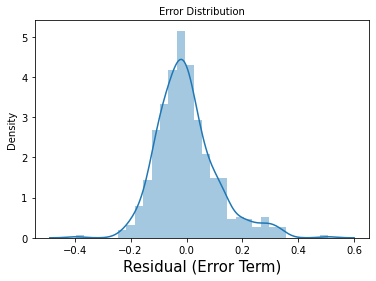

In [99]:
y_train_pred = regr.predict(X_train_rfe)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 15})
plt.title('Error Distribution', fontdict={'fontsize': 10})
plt.show()

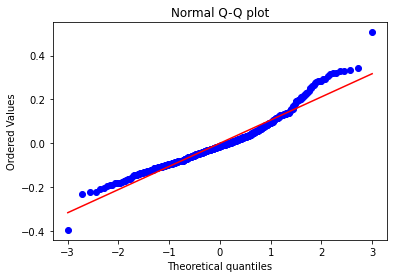

In [100]:
stats.probplot(residual, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

##### Assumption of Error Terms Independent

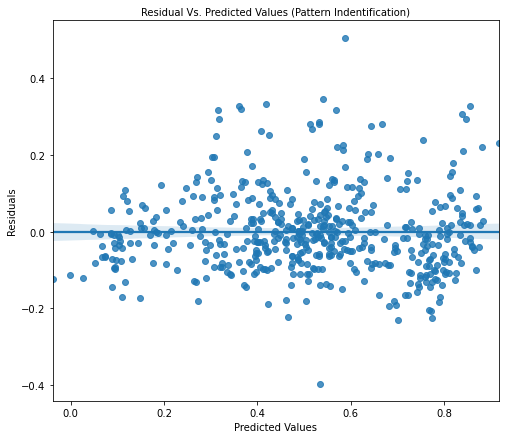

In [101]:
plt.figure(figsize=(8,7))
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 10})
plt.xlabel('Predicted Values', fontdict={'fontsize': 10})
plt.ylabel('Residuals', fontdict={'fontsize': 10})
plt.show()

In [102]:
print("Pearson Value for Predicted Value Against Residual: ", pearsonr(y_train_pred, residual)[0])

Pearson Value for Predicted Value Against Residual:  1.5057399771478686e-15


##### Heteroskedasticity

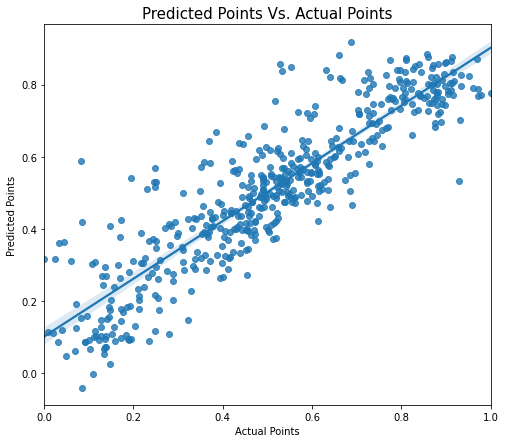

In [103]:
plt.figure(figsize=(8,7))
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 15})
plt.xlabel('Actual Points', fontdict={'fontsize': 10})
plt.ylabel('Predicted Points', fontdict={'fontsize': 10})
plt.show()

##### Muticolinearity

In [104]:
vif_cal(X_train_rfe)

,Features,VIF
0,temp,4.49
1,windspeed,4.20
2,season_winter,2.36
3,yr,1.97
4,season_spring,1.83
5,mnth_11,1.78
6,weathersit_Fair,1.49
7,mnth_7,1.42
8,mnth_12,1.37
9,holiday,1.04


#### 5.2 Model Testing

In [105]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'mnth_11', 'mnth_12', 'mnth_7',
       'season_spring', 'season_winter', 'weathersit_Fair'],
      dtype='object')

In [106]:
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head(5)

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_10,mnth_11,...,season_summer,season_winter,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Fair,weathersit_Good
instant,,,,,,,,,,,,,,,,,,,,,
621,0.400000,1,0,1,0.674353,0.518540,0.101229,0.925698,0,0,...,0,0,0,0,0,0,1,0,0,1
534,0.566667,1,0,1,0.616630,0.720694,0.331719,0.585617,0,0,...,1,0,0,1,0,0,0,0,1,0
273,0.966667,0,0,0,0.611185,0.533493,0.411189,0.598567,0,0,...,0,1,0,0,0,0,0,0,0,1
606,0.933333,1,0,1,0.769107,0.396531,0.175971,0.912245,0,0,...,0,0,0,0,0,1,0,0,0,1
102,0.366667,0,0,1,0.530590,0.665072,0.582516,0.200277,0,0,...,1,0,0,0,0,1,0,0,1,0


In [107]:
y_test = df_test.pop('cnt')

In [108]:
X_test = df_test[['yr', 'holiday', 'temp', 'windspeed', 'mnth_11', 'mnth_12', 'mnth_7',
       'season_spring', 'season_winter', 'weathersit_Fair']]

Coefficients: 
 [ 0.26679001 -0.12182872  0.43520227 -0.13073192 -0.07740906 -0.07326683
 -0.08751455 -0.14333894  0.05599495 -0.07727473]
Mean squared error: 0.01
Coefficient of determination: 0.76


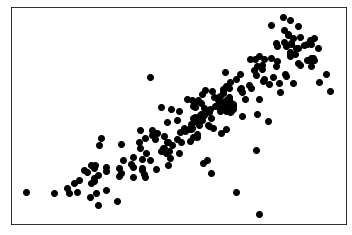

In [109]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_pred, y_test,  color='black')
#plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [110]:
r2_score(y_test, y_pred)

0.7625672854817072